 1. Intro:-
- Description of Data
- Features Description
- project Objective

2. Data Fetching:- 
- Importing packages
- Import the data

3. Cleaning the Data

4. Summary
- Summary statistics for numeric attribute
- Summary and count for categorical attribute

5. Exploratory data analysis
- Univariate analysis
-  histogram and count plots for all uni variables
- Bivariate analysis
-  relationship with income for all the remining variables
- Multivariate analysis
-  Correlation among the numeric variables.
-  Multivariate analysis between "income", "age", "gender"
- Multivariate Analysis between "income", "hours-per-week", "gender"
- Making new variable(capital_change)

6. Conclusion of Complete EDA

In [1]:
#2.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats#importing libraries 

In [2]:
#2.2
data =pd.read_csv("adult.csv") #importing dataset using pandas 

In [3]:
data.head(10) #getting glimpse of the dataset 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.shape #checking the shape of dataset

(48842, 15)

In [5]:
data_num=data.copy() #coping the dataset to not let any values to miss

In [6]:
"3.data cleaning "

attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 


attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib

# in these dataset we are having missing values as "?" we are replacing the missing values with the mode value with there 
# respective columns

In [7]:
data.head(10) #check whether the missing values replaced with mode value 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [75]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
capital_change     0
dtype: int64

In [8]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [9]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [10]:
data_num=data.drop(["educational-num","income"],axis=1)

In [11]:
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


For Age :
The mean or avarage value is 38 i.e. on an average the value of age attribute is 38.
Age is having the standerd deviation of 13.71 which means the deviation of age from the mean.
The value of Age attribute spreaded from 17 to 90.
The 1st quartile is 28 which means that the 25% of the observations lies below 28.
3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
The difference between the  1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which shows that the data is more dispersed after the value 48.
The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the
distribution right skewed.

For fnlwgt :
This is the sampling weight corresponding to the observations.
finalweight seems to be right skewed since there is large distance between median & maximum value as compared to 
minimum & median value.

For capital-gain :
capital-gain, the mean value is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From its qurtiles it is clearly visible that 75% observations are having capital gain 0.
capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as
the large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

For capital-loss :
This attribute is similar to the capital-gain i.e. most of the values are centered at 0(this can be told using the 
summary statistic as minimum is 0 and values lie under 75 percentile is also 0.
Mean is 87 but median is 0(i.e. mean is greater than median  this tells us that it is right skewed distribution).

For hours-per-week :
This attribute means number of working hours spend by an individual in a week.
In this data the hours per week atrribute varies from the range of 1 to 99.
75 percentage of the people are spend 45 or less working hours per week.
The IQR is very less i.e. [40-45] which indicates that the 50% of the observations are concentrated between 40 to 45.
Observations are very sparse below 25th percentile and after 75th percentile.
Using quartiles we can say that the data is approximately symmetical.
Minimum is one hour per week & maximum is 99 hours per week means person spending 99 hours working per week are 
very rare events. We will later analyze that which workclass they belong.

In [12]:
data.describe(include="O")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


Native-country has maximum number of unique categories of 41 categories.
But the native country is highly biased toward the U.S which has frequency of '44689' out of total '48842'(nearly 91%).
Occupation has more or less uniform distribution of categories as comparerd to the other attributes.
Race is also biased with the white race category(41762) with 85.5%.
The top category in workclass is Private having frequency of 36705 and percentage of 75.5%.

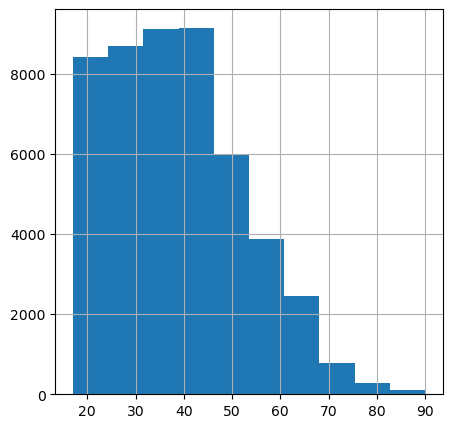

In [13]:
data['age'].hist(figsize=(5,5))
plt.show()

In [14]:
data[data["age"]>70].shape

(868, 15)

The above histogram shows that :

"age" attribute is not symmetrical.
it was rightskewed(But this is totally fine as younger adult earn wages not the older people)
Min and Max age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

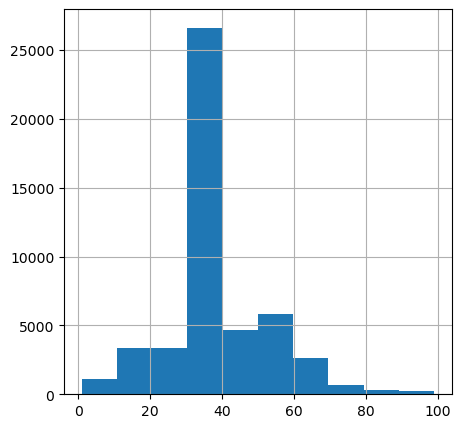

In [15]:
data['hours-per-week'].hist(figsize=(5,5))
plt.show()

In this data the hours per week atrribute varies from the range of "one" to 99.
Most people work from 30 to 40 hours per week, they are roughly 27,000 people.
There are also few people who works 80 to 100 hours per week and some less than 20 which is unusual.
75% of the people spend 45 or less than 45 working hours per week.

<AxesSubplot:>

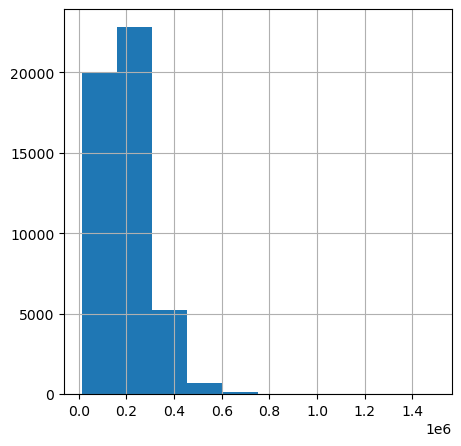

In [16]:
data["fnlwgt"].hist(figsize=(5,5))

This is the sampling weight corresponding to the observations.
The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

<AxesSubplot:>

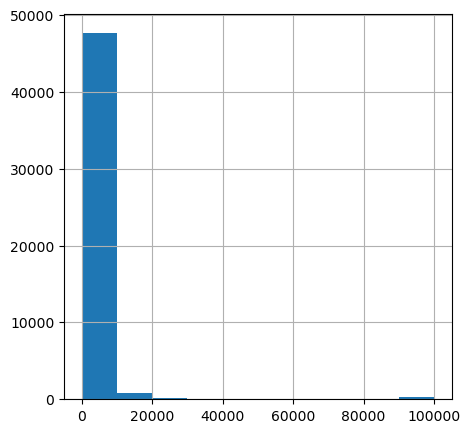

In [17]:
data["capital-gain"].hist(figsize=(5,5))

This histogram shows that most of the "capital-gain" values are centered to the 0 and very few are present at the 10k and 99k.
capital-gain is concentrated on the one particular value and other are spread with very large standard deviation(7452.01).
capital-gain shows that either the person has no gain or has gain of very large amount(10k or 99k).

<AxesSubplot:>

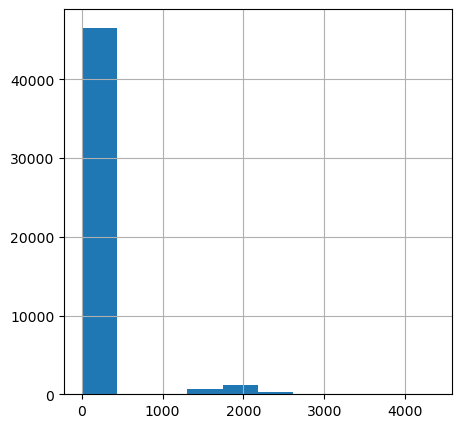

In [18]:
data["capital-loss"].hist(figsize=(5,5))

In [19]:
data[data["capital-loss"]>0].shape

(2282, 15)

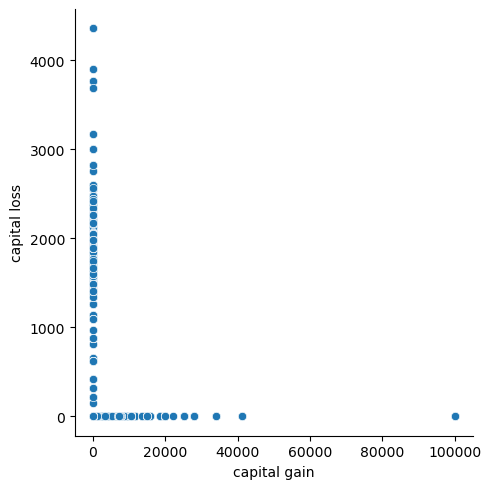

In [20]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Both capital gain and capital loss can be zero
If the capital-gain is zero there is possibility of capital loss being high or above zero.
If the capital-loss is zero there is possibility of capital.gain being high or above zero.

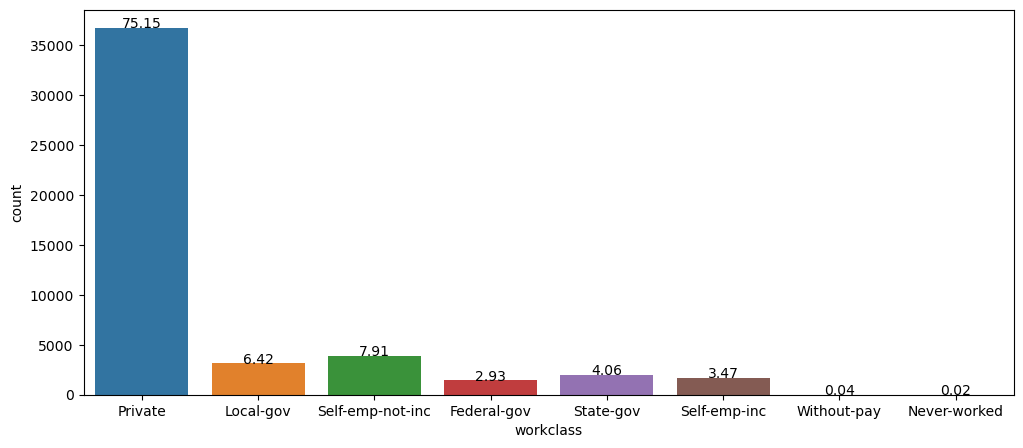

In [21]:
plt.figure(figsize=(12,5))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

this distribution shows that:
There are 8 unique categories present in the worclass attribute.
Most of them are belong to the private workclass which holdes 36705out of total which means 75.15% of overall workclass.
without-pay and never-worked has minimum count in workclass attribute(less than 1%(0.06)).
There is huge imbalance in these categories of workclass attribute.
this attribute is highly dominated by the single workclass.

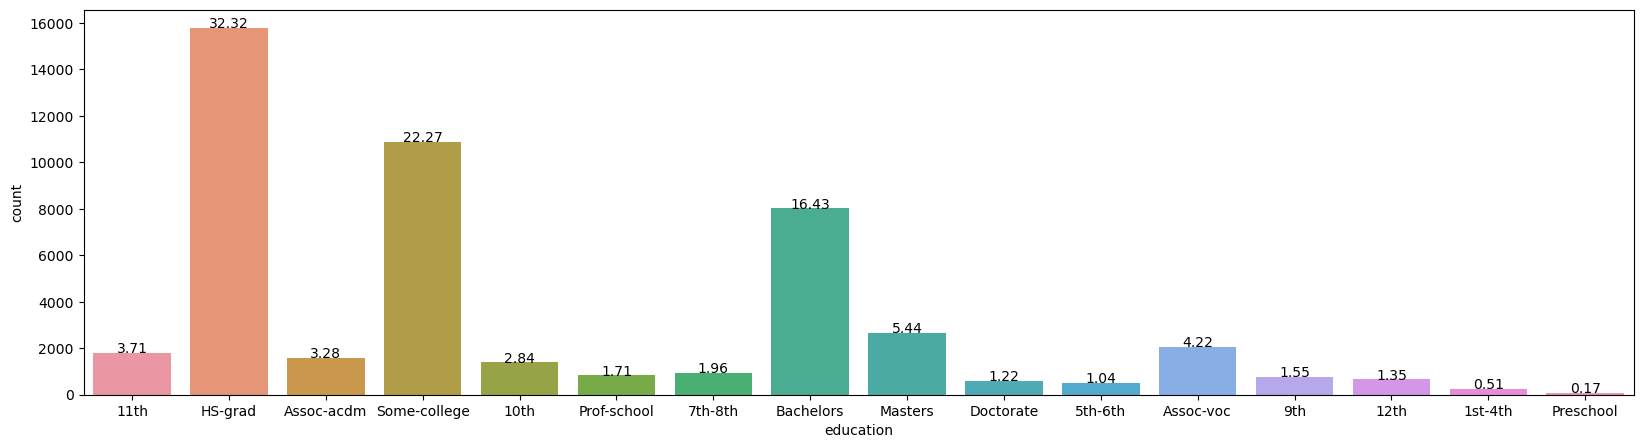

In [22]:
plt.figure(figsize=(20,5))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 16 unique categories present in this education attribute.
Hs-grad holds 32.32% of all the education attribute.
HS-grad (15784) has the maximum no.of observations followed by some-college which is 2nd highest count(10878) and Bachelors which has 3 rd highest count (8025).
Pre-school has minimum samples i.e. 83.

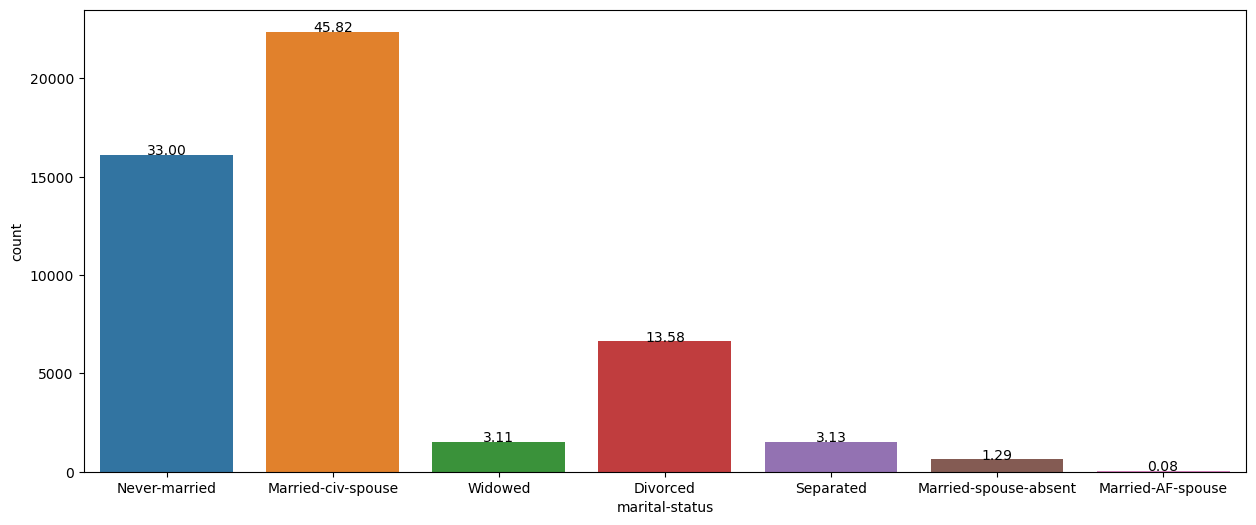

In [23]:
plt.figure(figsize=(15,6))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This marital-status has 7 unique categories.
Two of them are very dominate over other categories(these are Never-married(33%) and married-civ-spouse(45.82%).
Married-civ-spouse holds the maximum number of samples.
Married-AF-spouse holds minimum number of observations.

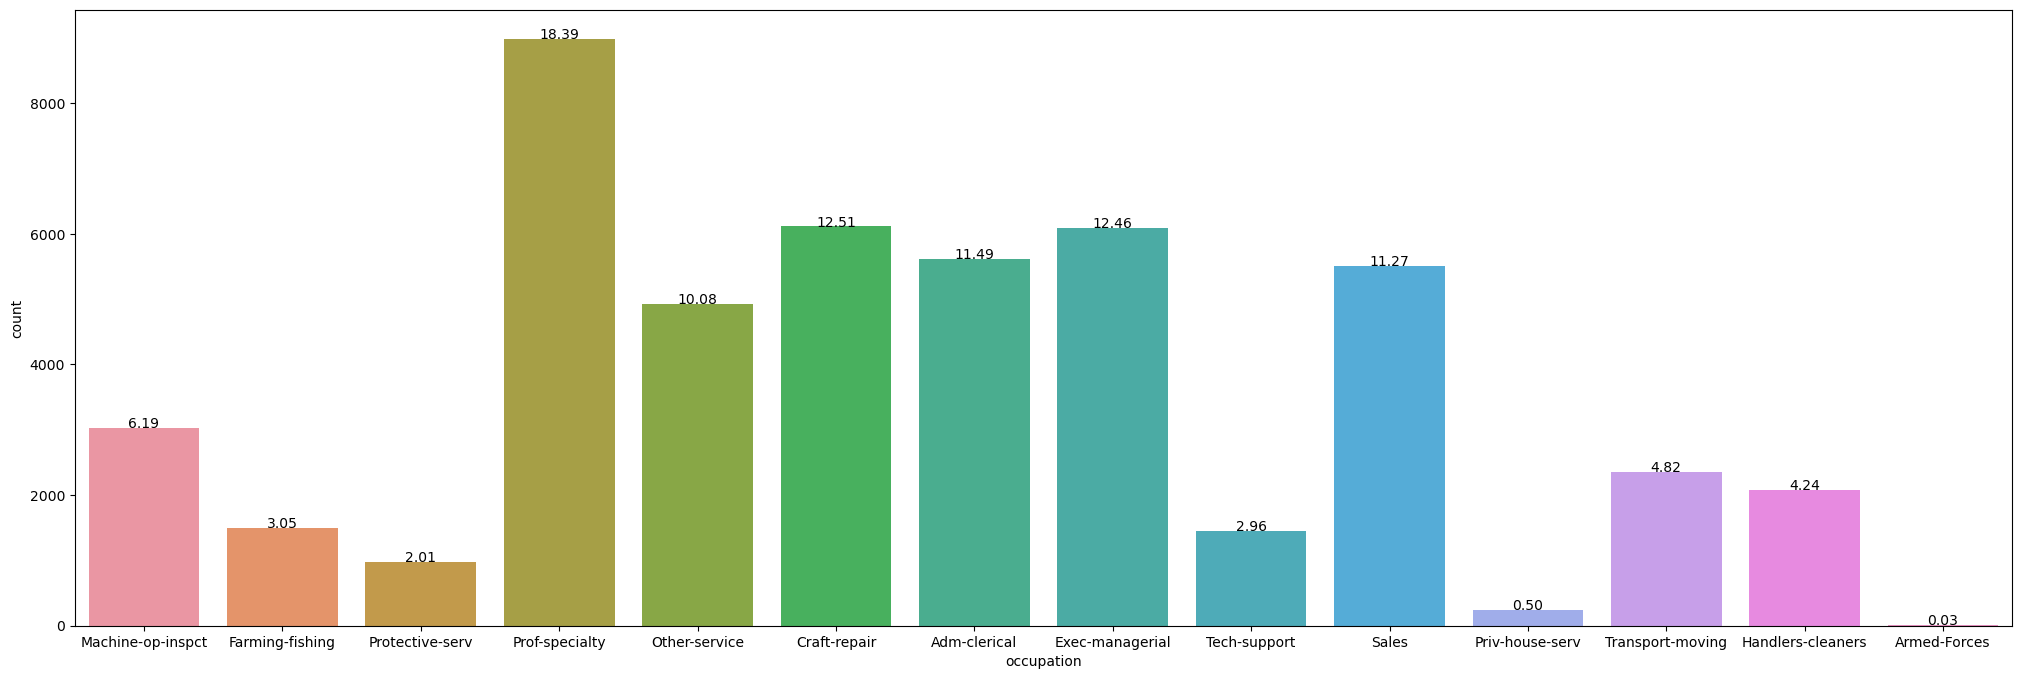

In [24]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 14 unique different categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces has very minimum samples in the occupation attribute.

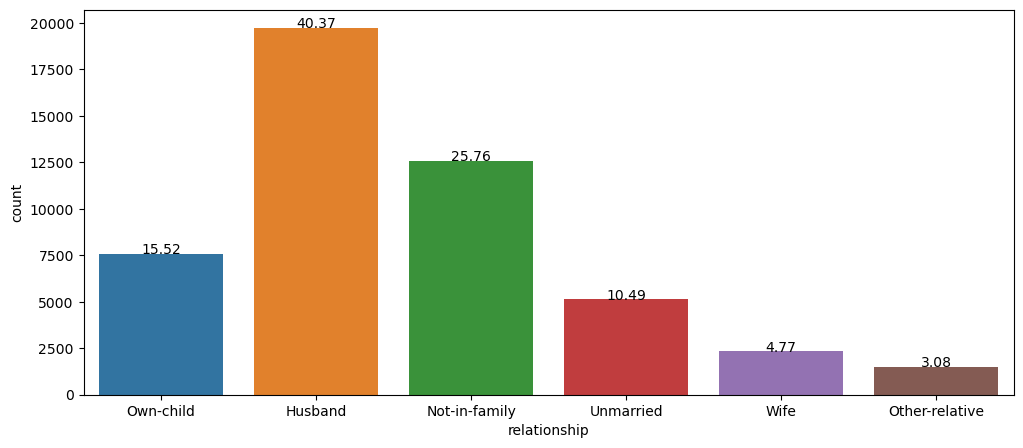

In [25]:
plt.figure(figsize=(12,5))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 6 different categories in the relationship attribute.
Husband has maximum percentage which holds 40.37% among all categories followed by not-in-family(25.76%)

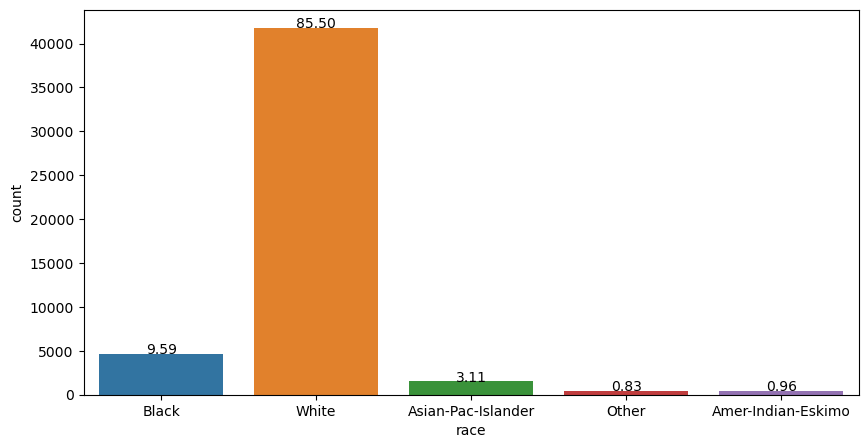

In [26]:
plt.figure(figsize=(10,5))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 5 different categories in the race attribute.
Most of them are "white" which is around 85.50%.
This dataset is totally biased toward the "white" race.
Second major race in the dataset is the "black" which has just 9.59%.

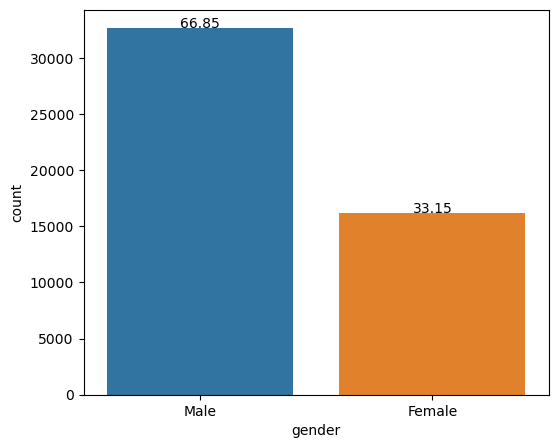

In [27]:
plt.figure(figsize=(6,5))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Gender has 2 unique categories.those are male and female.
But the frequency of male(32650) is higher than that of female(16192) categories.
Distribution shows that this dataset is skewed toward the male with nearly 67%.

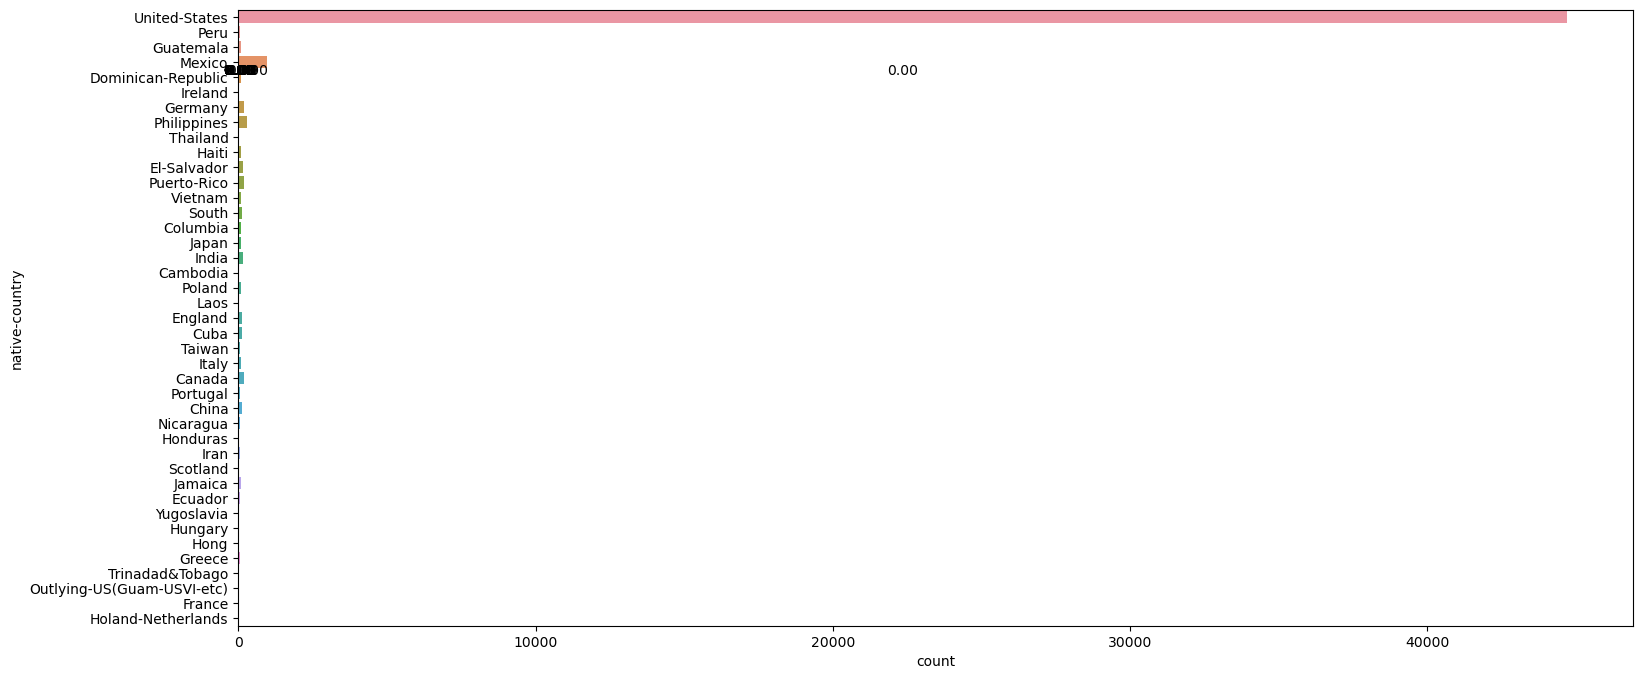

In [28]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

This dataset is taken from the United States.
As 91.5% of them have native country America and others are immigrants.

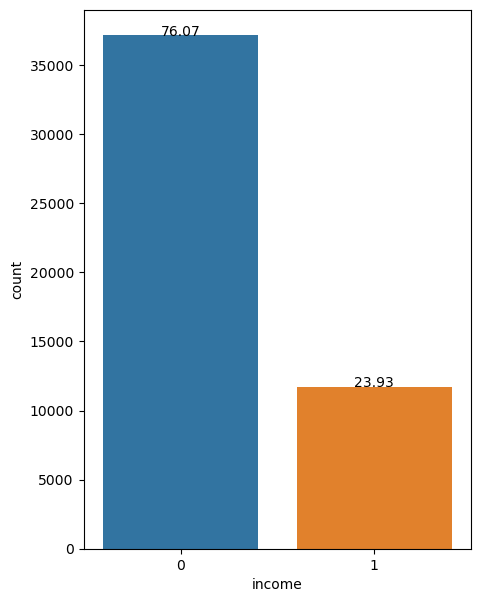

In [29]:
plt.figure(figsize=(5,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


This dataset is not balanced, i.e. 23.93%of them are belong to income catogery 1 (who earns more than 50k) and 76% fall under the income catogery 0 (who earns less than 50k).

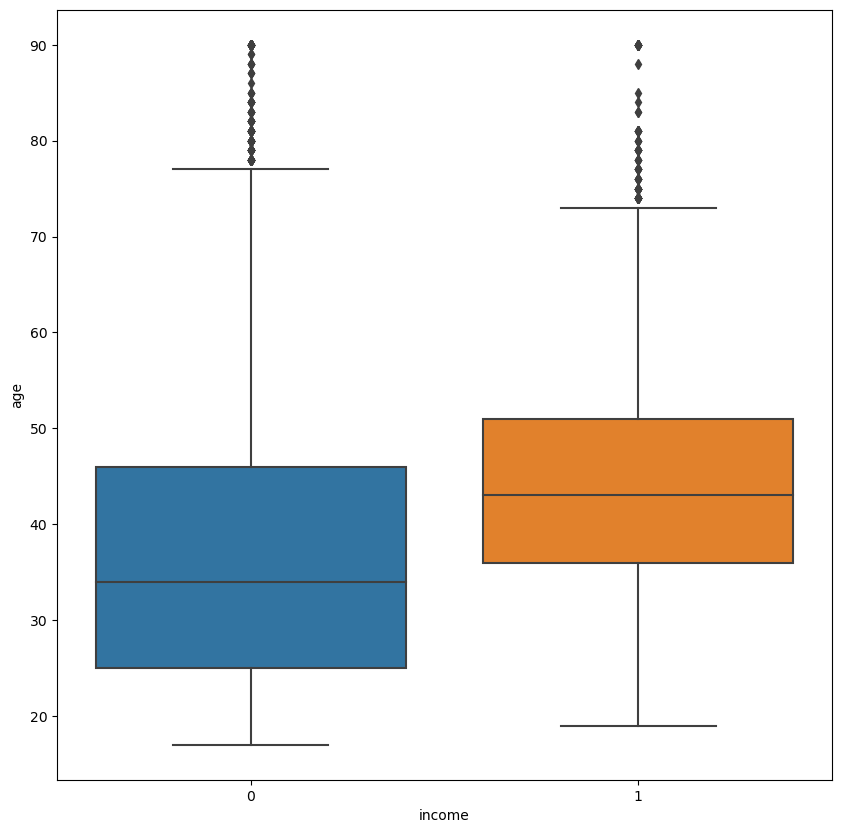

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [31]:
data[['income', 'age']].groupby(['income']).mean().sort_values(by='age', ascending=False)

,age
income,
1,44.275178
0,36.872184


The mean "age" for Income group(<=50k) which is 36.8 years.
And for Income group(>50k) it is 44.2 years

Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
Interquartile range which is also called as IQR :
For Income group(<=50k) , IQR is between the [25,46] (long range)
Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

For Income group(>50k) , IQR is between [38,50] (shorter range)

In [32]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)]

income_1 = data[data['income']==1]['age']
income_0 = data[data['income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [33]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject the null hypothesis")

ttest 5.546398207553577
p value 9.86456359490227e-08
we reject null hypothesis


by these We can conclude that, there is a significant difference in the mean ages of income group >50k and income group <=50k.It means that age has some contribution to the distinguish income groups.

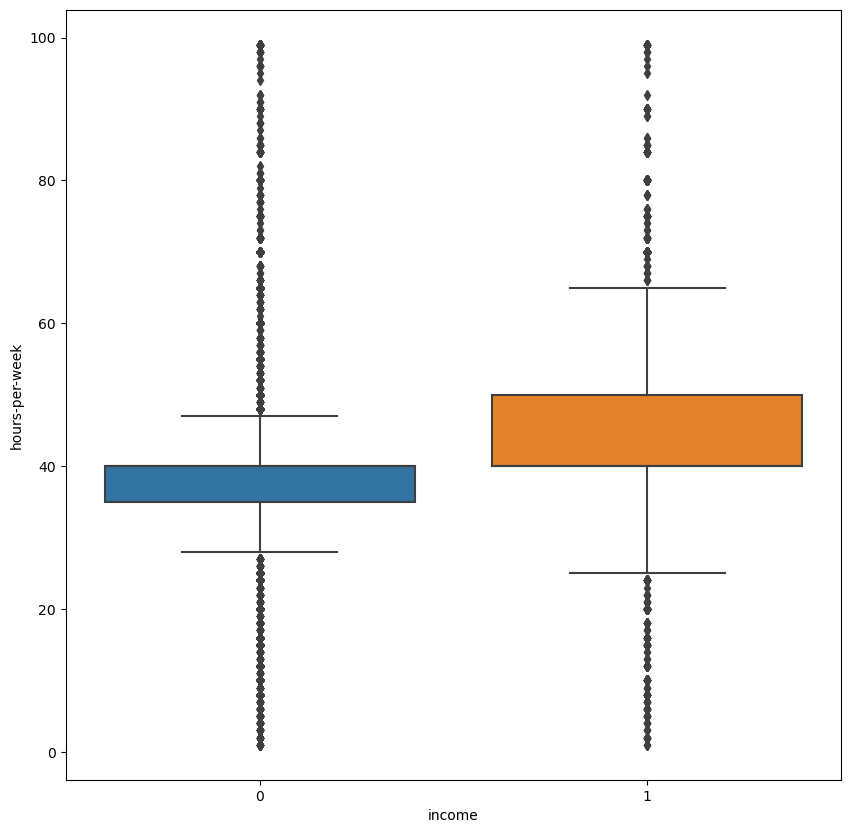

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

the Bivariate Analysis with the boxplot shows that:

The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.
Interpretation

Income group who earns >50k has spend approximatly 44 "hours-per-week".(long hours)
Income group who earns <=50k has spend approximatly 37 "hours-per-week".
The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) i.e.~[23,68].

Interpretation

Income group who earns more than 50k have flexible working hours
More Outliers present in the Income group who earns less then or equal 50k.

In [35]:
data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['income']==1]["hours-per-week"]
income_0 = data[data['income']==0]["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

ttest 5.080912800978442
p value 0.0000008976786962915274686072549317761293252715404378250241279602050781
we reject null hypothesis


We can conclude that there is difference in Mean of income group >50k and income group <=50k.
It means that hours-per-week has some contribution to the distinguish income groups.

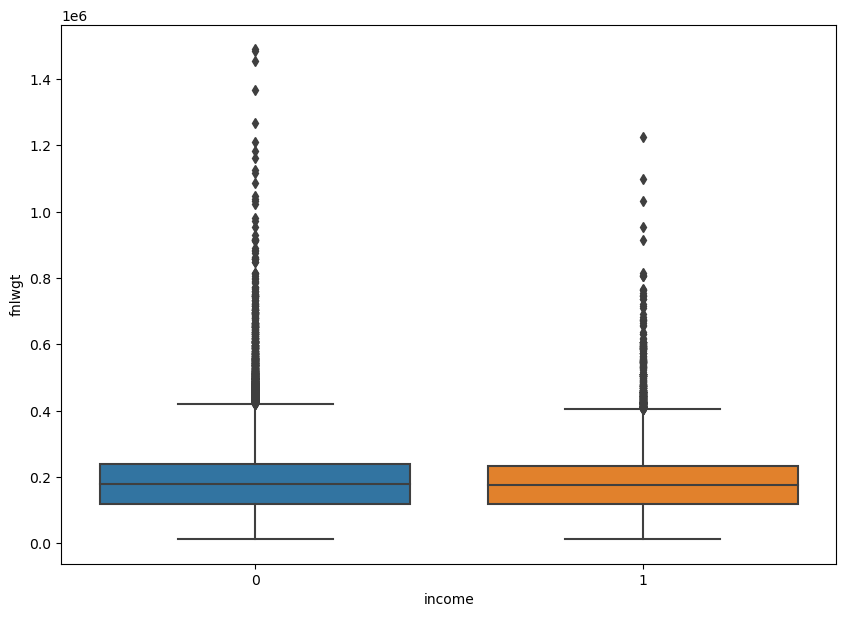

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

As evident from the above plot, both income groups has the nearly same IQR and median is centered on 0.
Outliers are present in both the income groups.
It seems that the boxplot for final weight w.r.t income groups is similar except the no.of outliers in income group who earns <=50k is more.

In [37]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 

income_1 = data[data['income']==1]["fnlwgt"]
income_0 = data[data['income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

ttest -0.2631860584735908
p-value 0.7926813392978407
we fail to reject null hypothesis


We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
It means that final weight has no contribution to the distinguish income group.

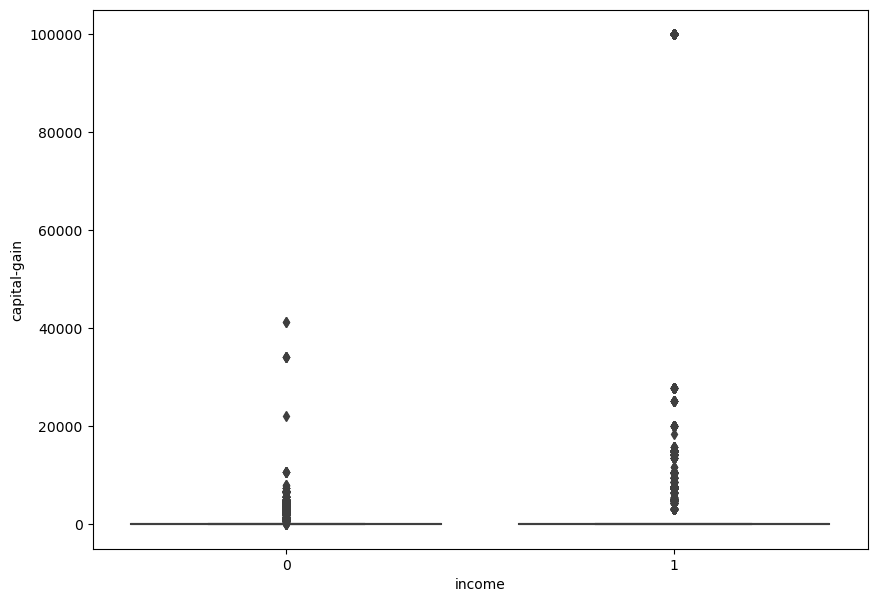

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

Most of the capital gains values are concentrated at 0 for both the income group .


In [39]:
data = data[(np.abs(stats.zscore(data["capital-gain"])) < 3)] 

income_1 = data[data['income']==1]["capital-gain"]
income_0 = data[data['income']==0]["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

ttest 3.7677273764441126
p-value 0.0002733413672850664
we reject null hypothesis


We can conclude that there is difference in Mean of income group >50k and income group <=50k.

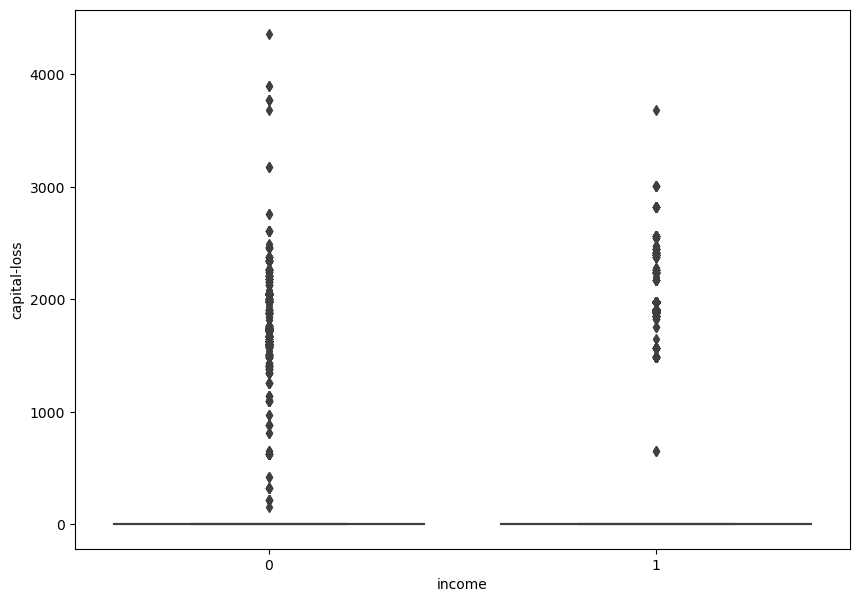

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

This boxplot is similar to the capital gain boxplot where most of the values are concentrated at 0.

In [41]:
income_1 = data[data['income']==1]["capital-loss"]
income_0 = data[data['income']==0]["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

ttest 2.760326656040489
p-value 0.006746699449150257
we reject null hypothesis


We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
It means that capital-loss is unable to seperate the income groups.

posx and posy should be finite values
posx and posy should be finite values


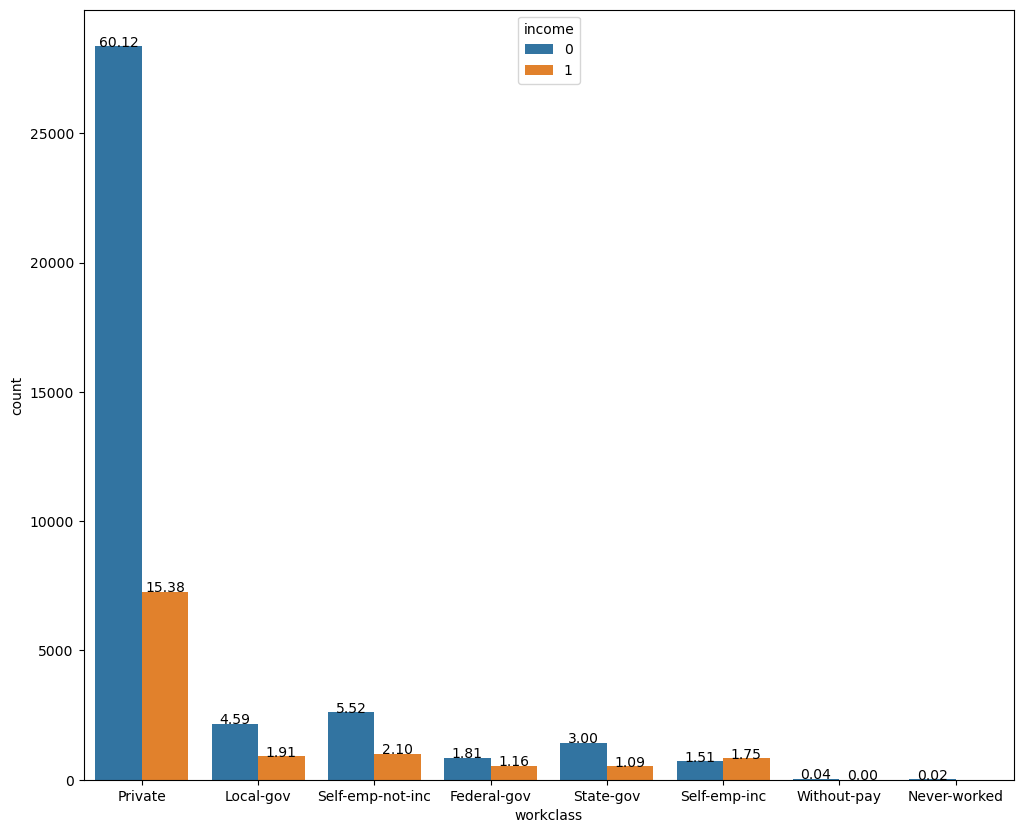

In [42]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).
self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
In Federal-gov workclass nearly more than half of the people earn >50k.

In [43]:
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
workclass,,
Local-gov,7,2
Private,56,12
Self-emp-inc,2,3
Self-emp-not-inc,4,2
State-gov,3,3


In [44]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=4
p_value 0.10332814807609494
[[ 6.89361702  2.10638298]
 [52.08510638 15.91489362]
 [ 3.82978723  1.17021277]
 [ 4.59574468  1.40425532]
 [ 4.59574468  1.40425532]]
probability=0.950, critical=9.488, stat=7.697
Independent (fail to reject H0)


Final conclusion
from Chi-Squared test,
As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income

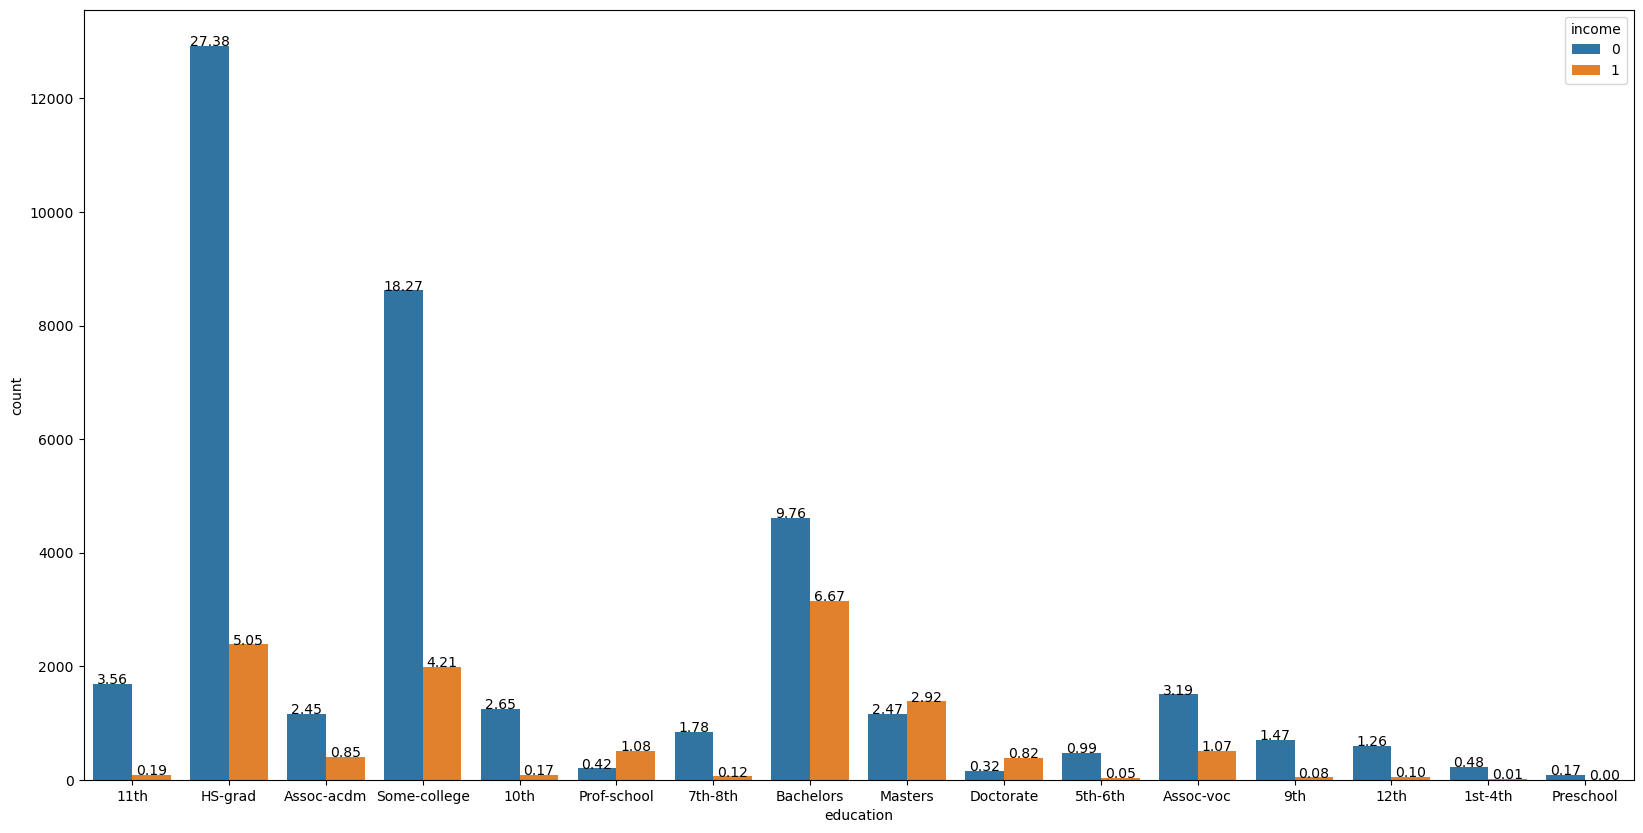

In [45]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


Despite of the fact that the most of the categories fall under the HS-grad but the interesting thing is that only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
These are prof-school, masters and doctorate.
We can also infer that higher eduction may provide better earnings.

In [46]:
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,2,0
12th,2,0
5th-6th,1,0
7th-8th,2,0
9th,2,0
Assoc-voc,3,2
Bachelors,7,9
Doctorate,0,1
HS-grad,27,3


In [47]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=10
p-value 0.0003984658085764228
[[ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 0.76595745  0.23404255]
 [ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 3.82978723  1.17021277]
 [12.25531915  3.74468085]
 [ 0.76595745  0.23404255]
 [22.9787234   7.0212766 ]
 [ 5.36170213  1.63829787]
 [19.91489362  6.08510638]]
probability=0.950, critical=18.307, stat=32.013
Dependent (reject H0)


With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between the two categorical variables.
We can conclude that there is some dependency of "education" attribute on the target variable "income"

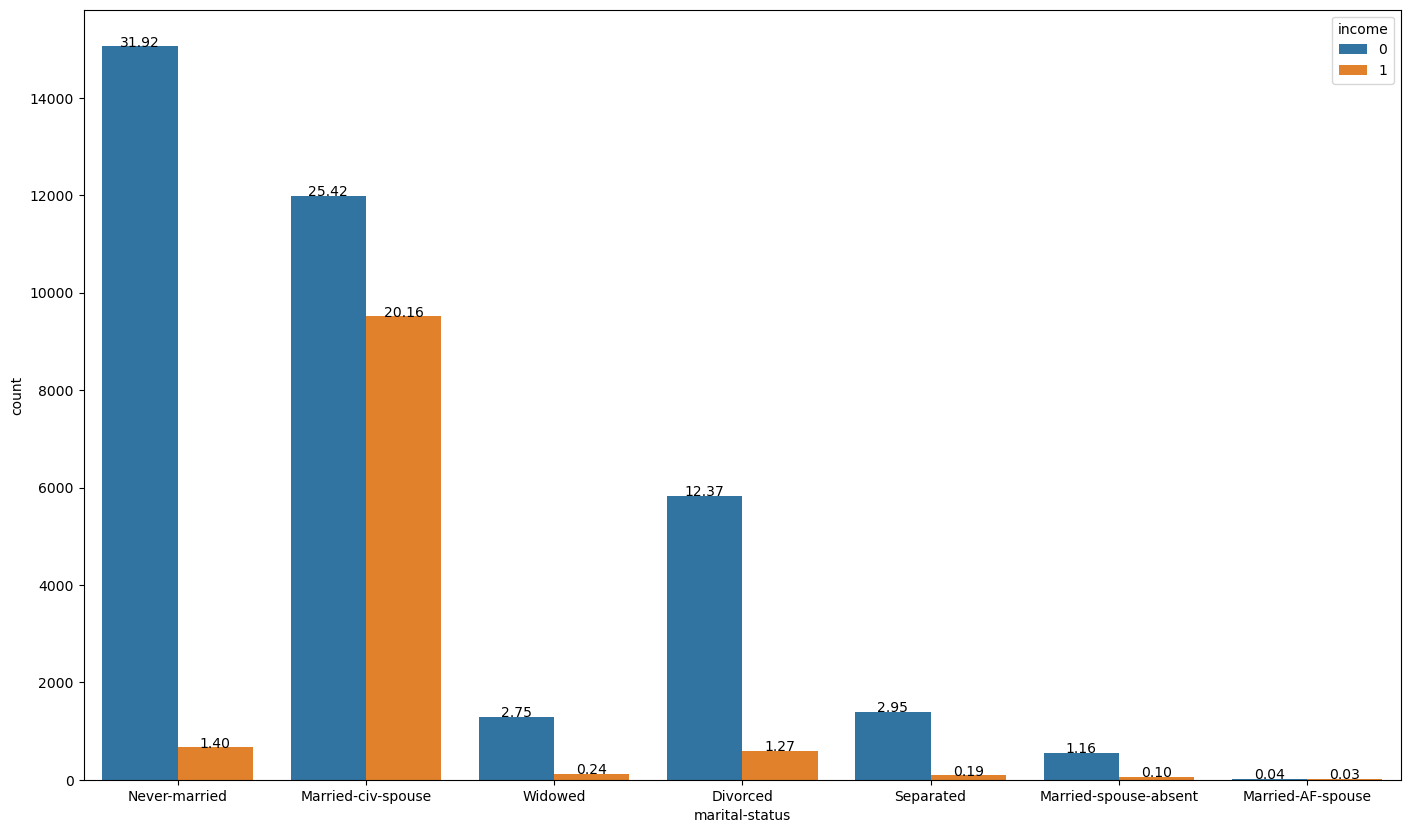

In [48]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Married-civ-spouse has the highest percentage of 20.44% of falling under the income group 1grater than 50k.
Despite that the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

In [49]:
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
marital-status,,
Divorced,11,1
Married-civ-spouse,24,18
Married-spouse-absent,2,1
Never-married,30,1
Separated,3,1
Widowed,2,0


In [50]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0026955070813438793
[[ 9.19148936  2.80851064]
 [32.17021277  9.82978723]
 [ 2.29787234  0.70212766]
 [23.74468085  7.25531915]
 [ 3.06382979  0.93617021]
 [ 1.53191489  0.46808511]]
probability=0.950, critical=11.070, stat=18.209
Dependent (reject H0)


With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "marital-status" attribute on the target variable "income"

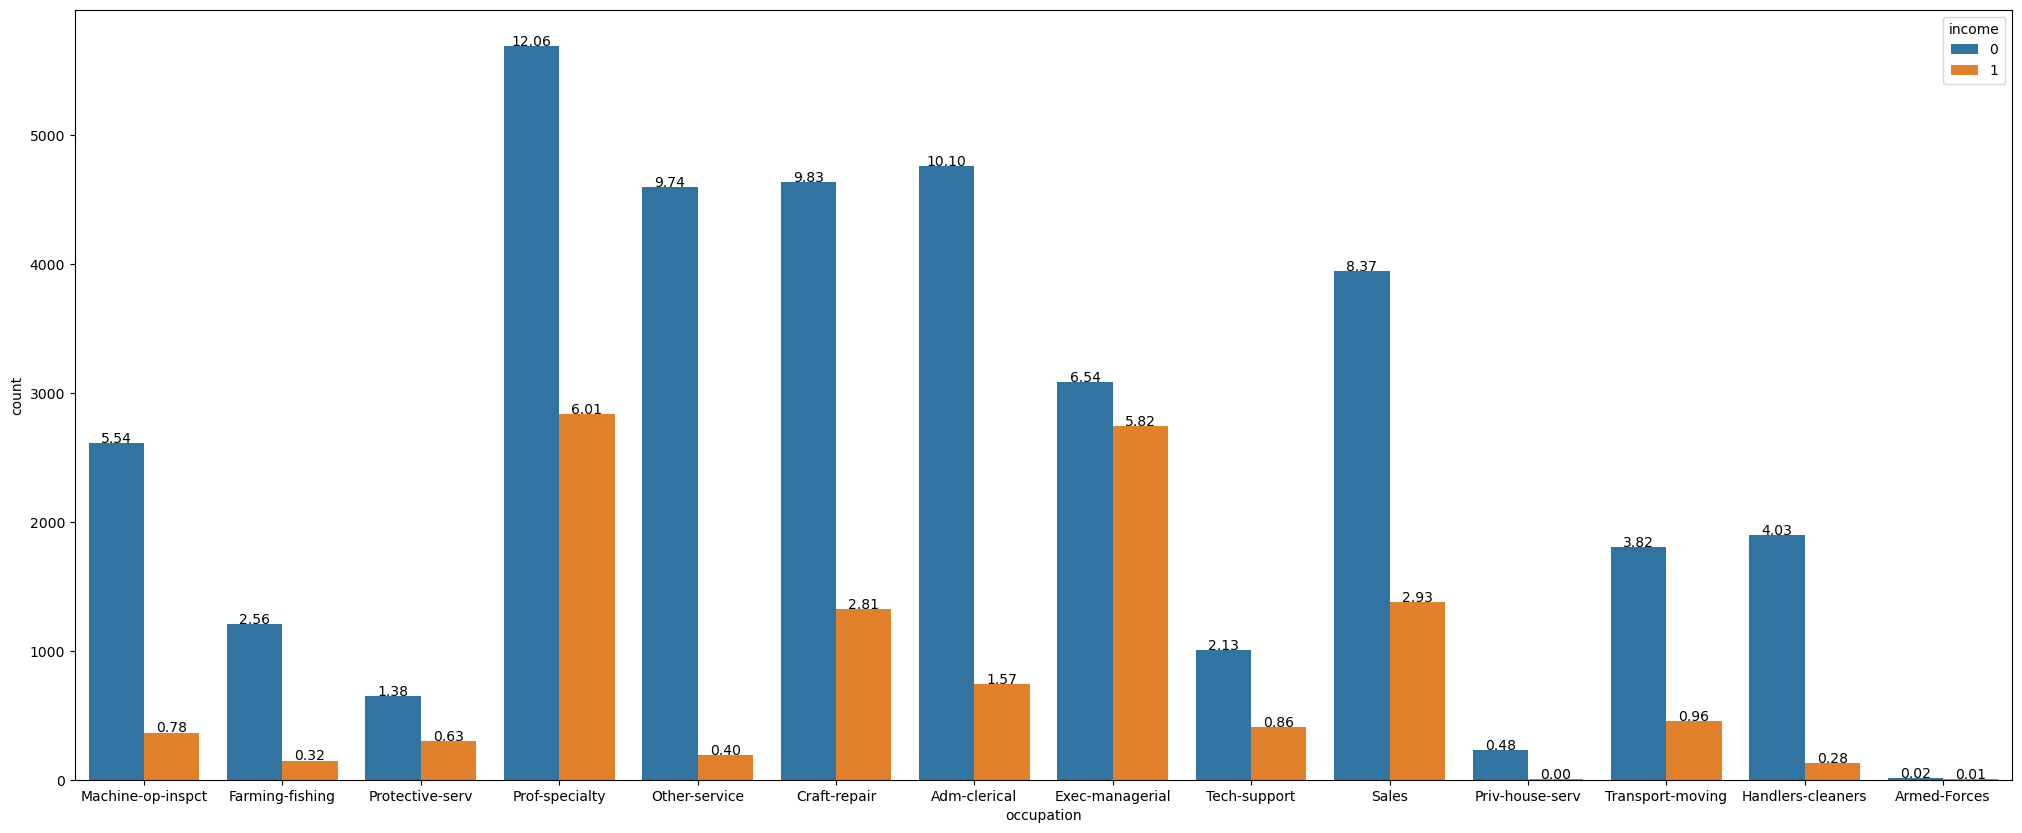

In [51]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This countplot explain following things:

Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k

In [52]:
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
occupation,,
Adm-clerical,9,1
Craft-repair,7,3
Exec-managerial,8,10
Farming-fishing,1,0
Handlers-cleaners,1,0
Machine-op-inspct,8,0
Other-service,14,0
Prof-specialty,13,2
Protective-serv,0,1


In [53]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[ 7.65957447  2.34042553]
 [ 7.65957447  2.34042553]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 6.12765957  1.87234043]
 [10.72340426  3.27659574]
 [11.4893617   3.5106383 ]
 [ 0.76595745  0.23404255]
 [ 5.36170213  1.63829787]
 [ 3.82978723  1.17021277]
 [ 3.06382979  0.93617021]]
probability=0.950, critical=19.675, stat=23.957
Dependent (reject H0)


With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "occupation" attribute on the target variable "income"

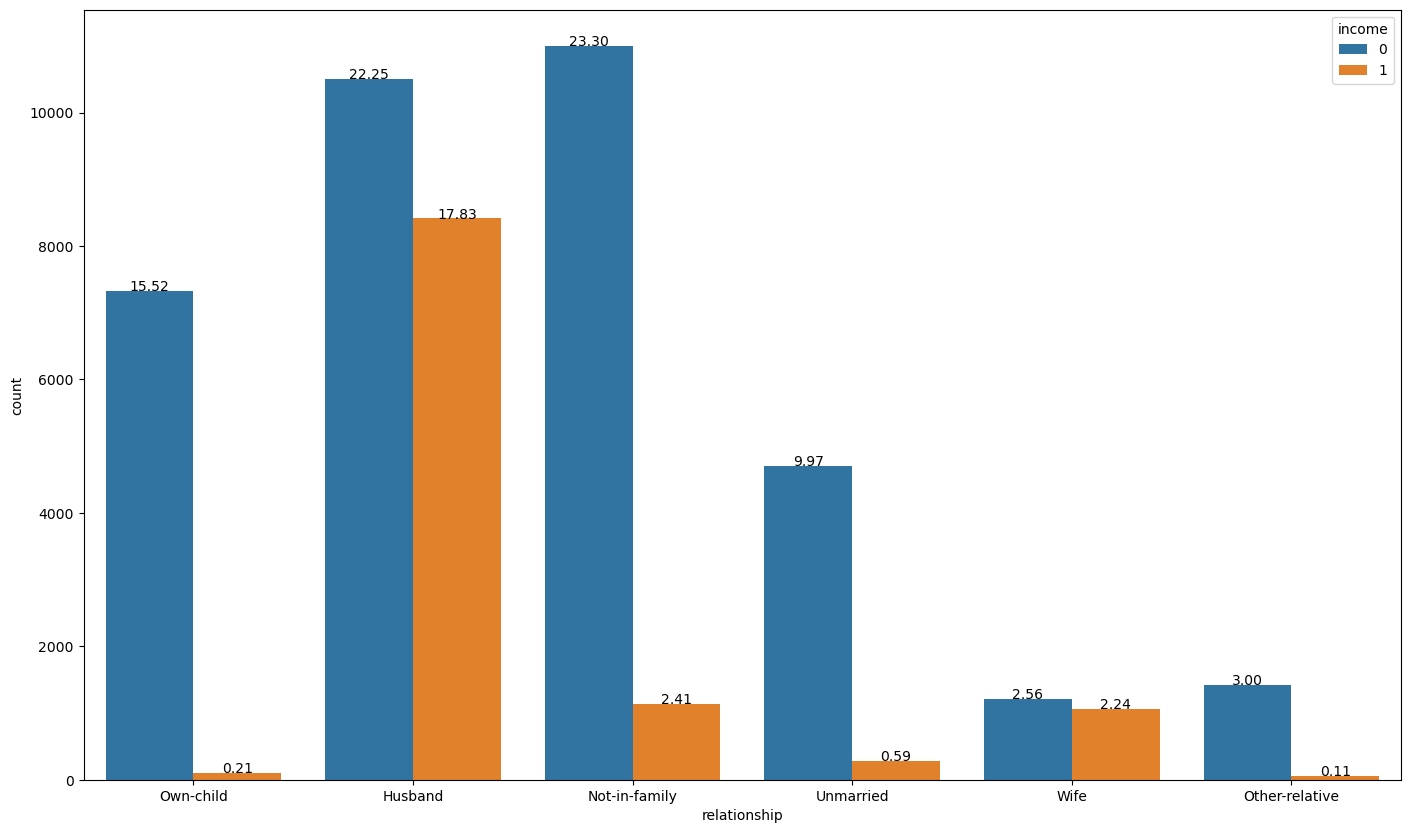

In [54]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This countplot explain following things:

husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
"own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
There is huge difference between the percentage of fall either groups except for "husband" and "wife".

In [55]:
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
relationship,,
Husband,21,18
Not-in-family,15,3
Other-relative,1,0
Own-child,21,0
Unmarried,11,1
Wife,3,0


In [56]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[29.87234043  9.12765957]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [16.08510638  4.91489362]
 [ 9.19148936  2.80851064]
 [ 2.29787234  0.70212766]]
probability=0.950, critical=11.070, stat=20.874
Dependent (reject H0)


With the help of Chi-Squared test,

As we have rejected the H0, that there are independent to each other..
We can conclude that is some dependency of "relationship" attribute on the target variable "income"

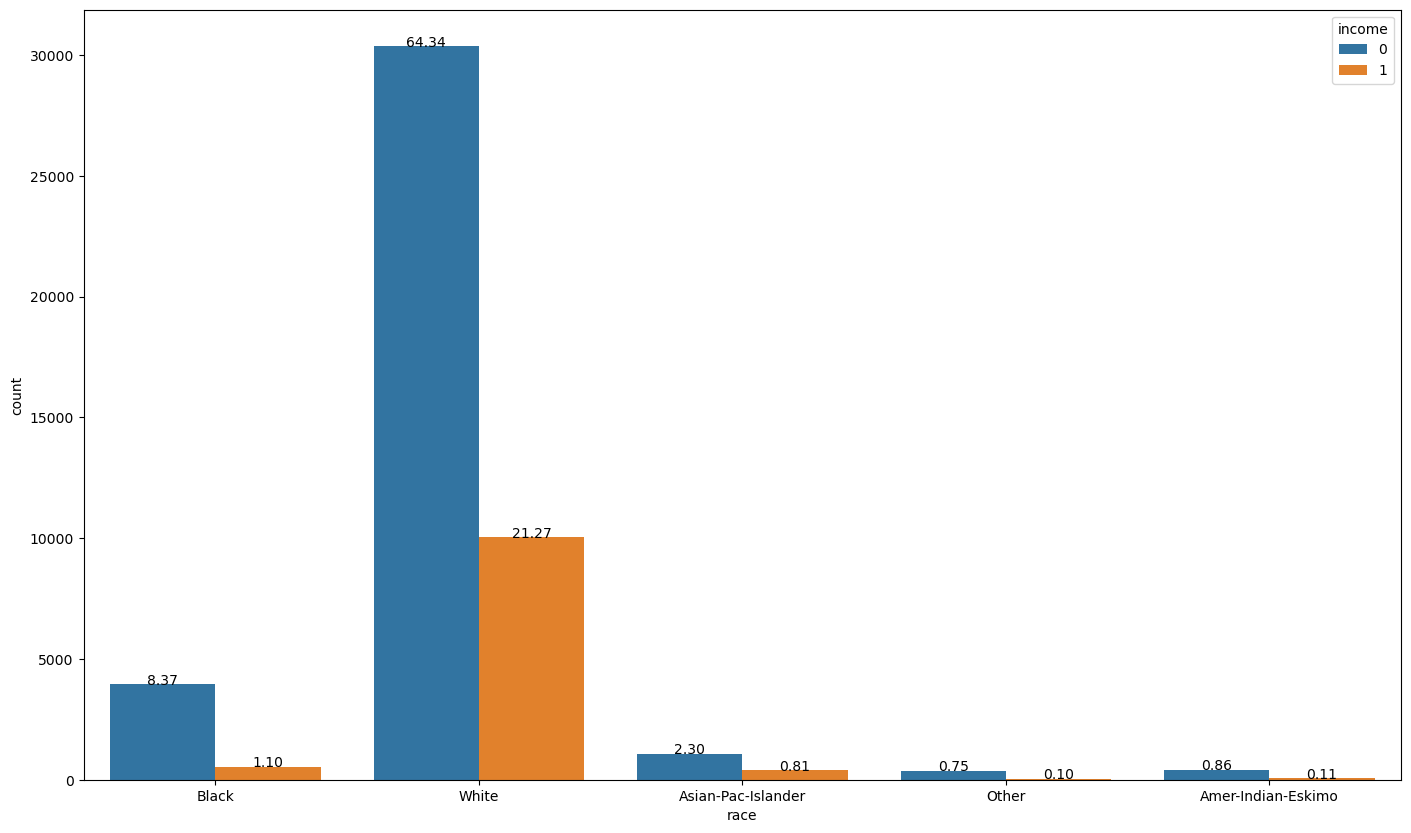

In [57]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This countplot explain following things:

The relationship of "white" race with "income" can easily guess based on previous summary statistics.
There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

In [58]:
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
race,,
Asian-Pac-Islander,5,0
Black,5,2
Other,2,0
White,60,20


In [59]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 0.501730316713183
[[ 3.82978723  1.17021277]
 [ 5.36170213  1.63829787]
 [ 1.53191489  0.46808511]
 [61.27659574 18.72340426]]
probability=0.950, critical=7.815, stat=2.357
Independent (fail to reject H0)


With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "race" attribute on the target variable "income"

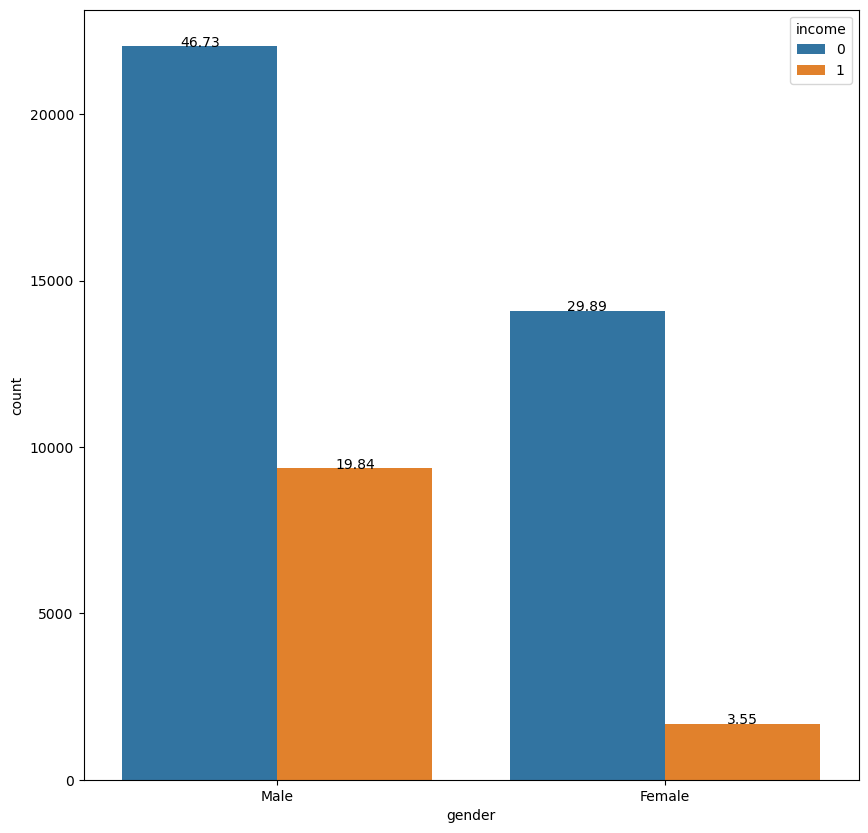

In [60]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

For "female" earning more than 50k is rare with only 3.62% of all observations.
But for male, 20.31% of all people earn more than 50k .

In [61]:
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
gender,,
Female,29,1
Male,43,21


In [62]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.003909409357411635
[[22.9787234  7.0212766]
 [49.0212766 14.9787234]]
probability=0.950, critical=3.841, stat=8.325
Dependent (reject H0)


As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "gender" attribute on the target variable "income"

In [63]:
c_t = pd.crosstab(data['native-country'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False)
c_t

income,0,1
native-country,,
Dominican-Republic,1,0
El-Salvador,1,0
Guatemala,1,0
Honduras,1,0
Hong,1,0
Mexico,1,0
Philippines,1,0
United-States,65,22


In [64]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=7
p_value 0.9406455672350347
[[ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [66.63829787 20.36170213]]
probability=0.950, critical=14.067, stat=2.311
Independent (fail to reject H0)


As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "native-country" attribute on the target variable "income"

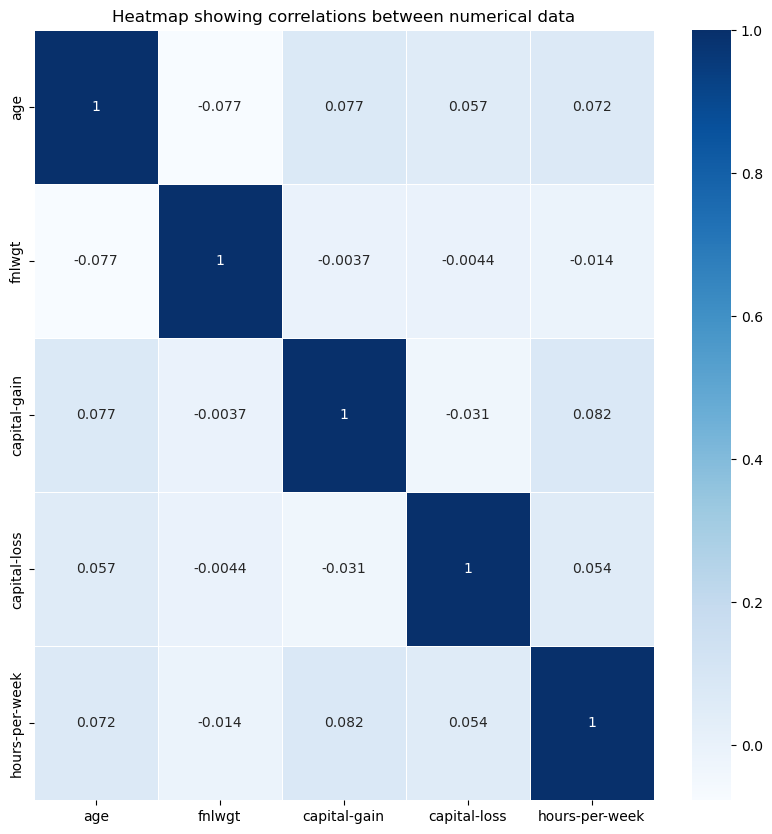

In [65]:
plt.figure(figsize=(10,10))  
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

There is no strong correlation among the numeric attributes.
There is neither strong positive nor strong negative correlation present in any variable .
The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).

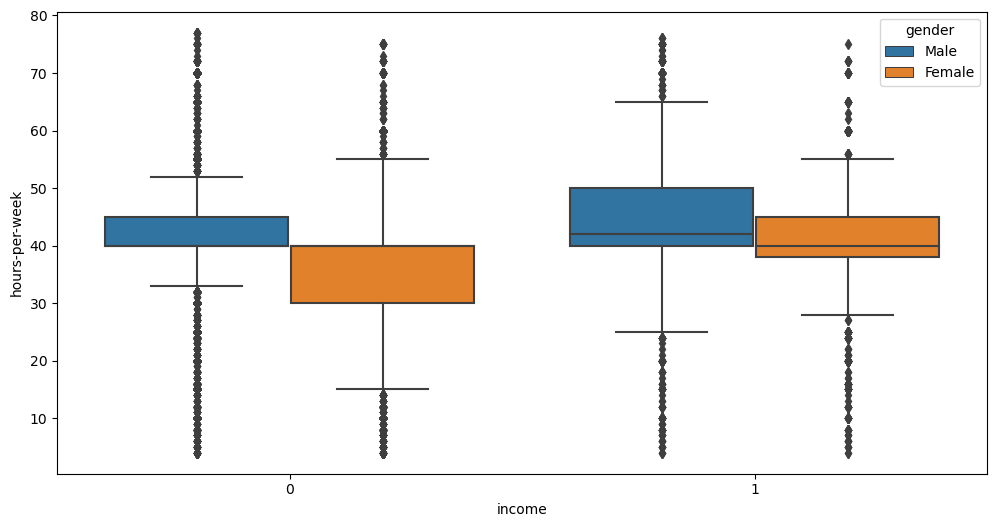

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data)
plt.show()

The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
Boxplot range for Income group who earns <=50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
Male ~[32,52]
Female ~[17,57]

interpretation
Females have more flexible working hours per week in the income groups who earns <=50k

Boxplot range for Income group who earns >50k [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] i.e.
Male ~[23,63]
Female ~[30,57]

interpretation
Males have more flexible working hours per week in the income groups who earns <=50k

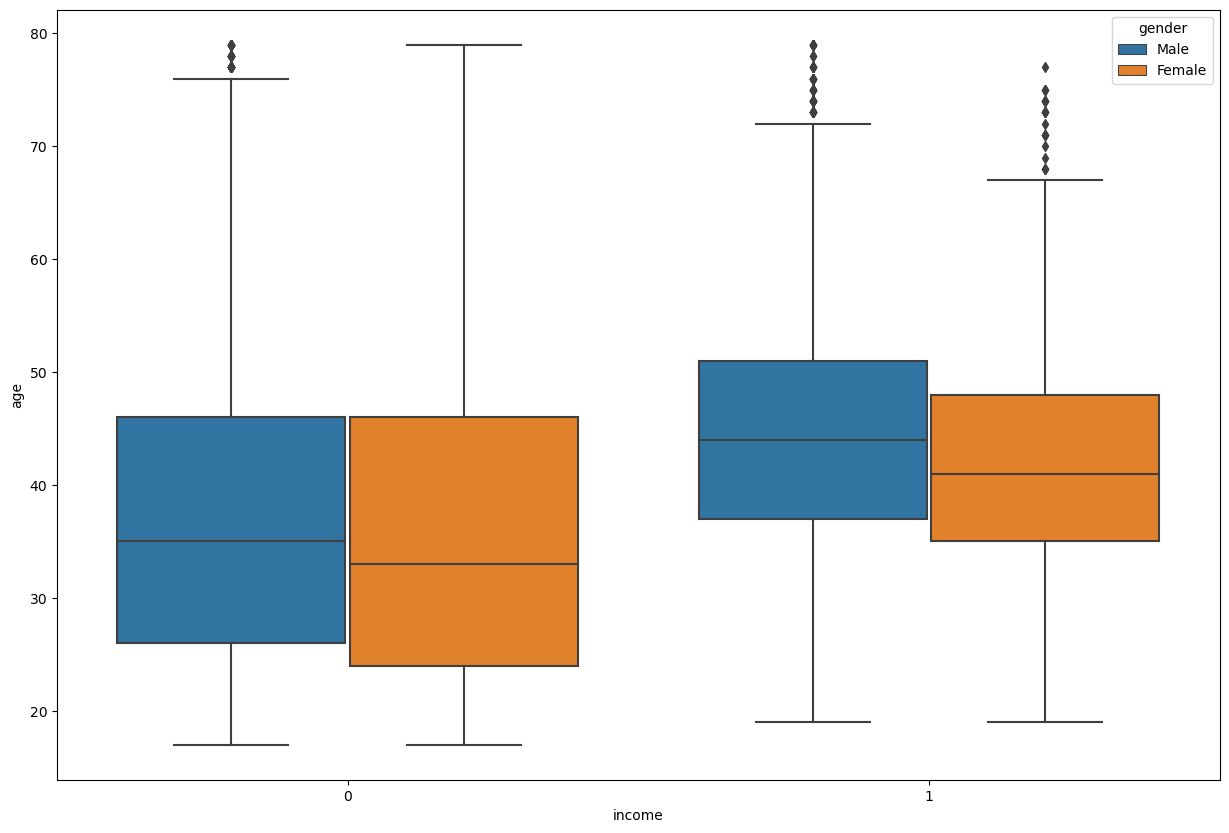

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=data)
plt.show()

Multivariate analysis between "income", "age", "gender" shows that:

Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.

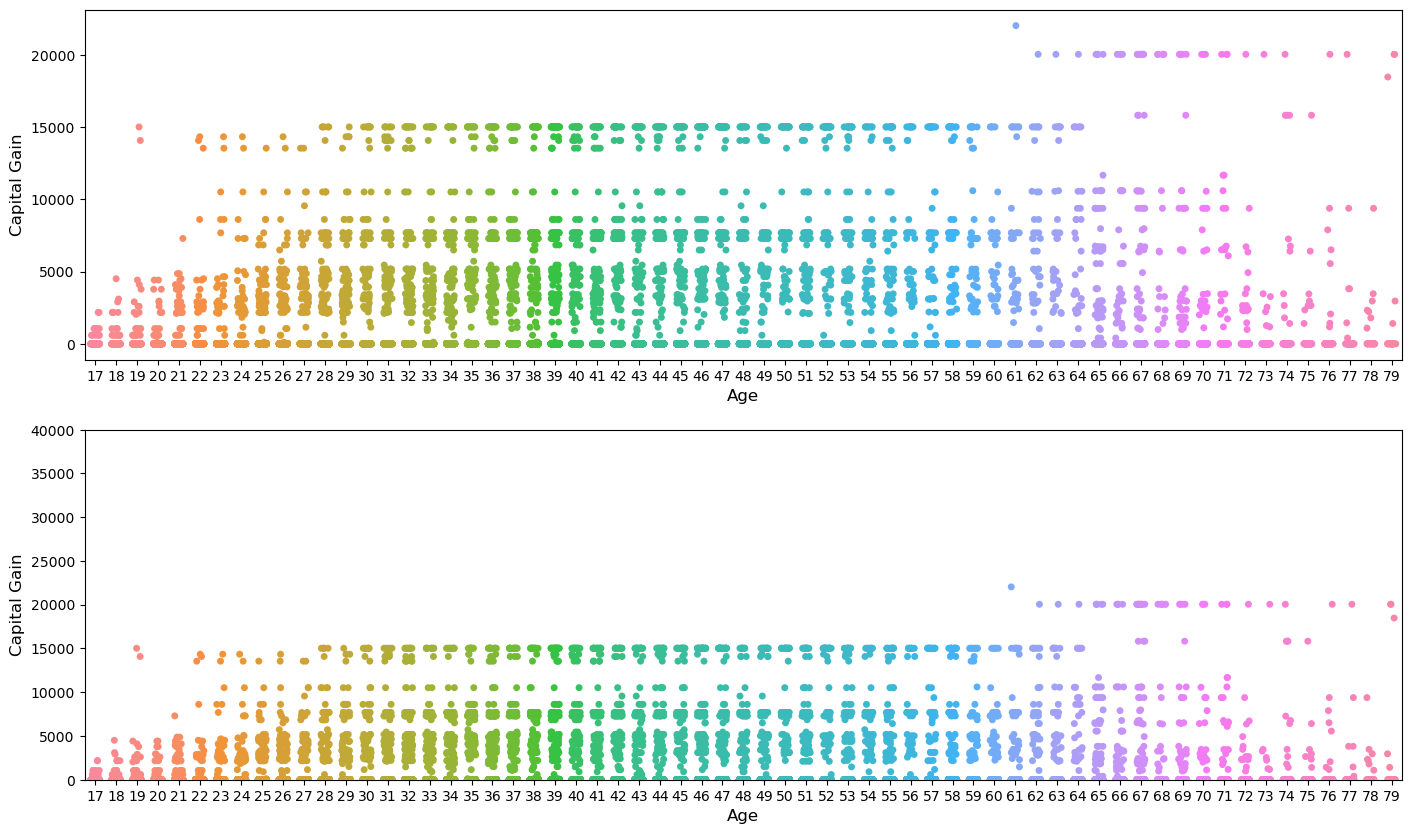

In [68]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
Age 90 doesn't follow the pattern.
Capital.gain of 99999 is clearly a outlier .

In [69]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


At age 90 people can't work in goverment or private sectors. But there are some observations present in our dataset which shows that despite the age of 90 years they work in those sectors.

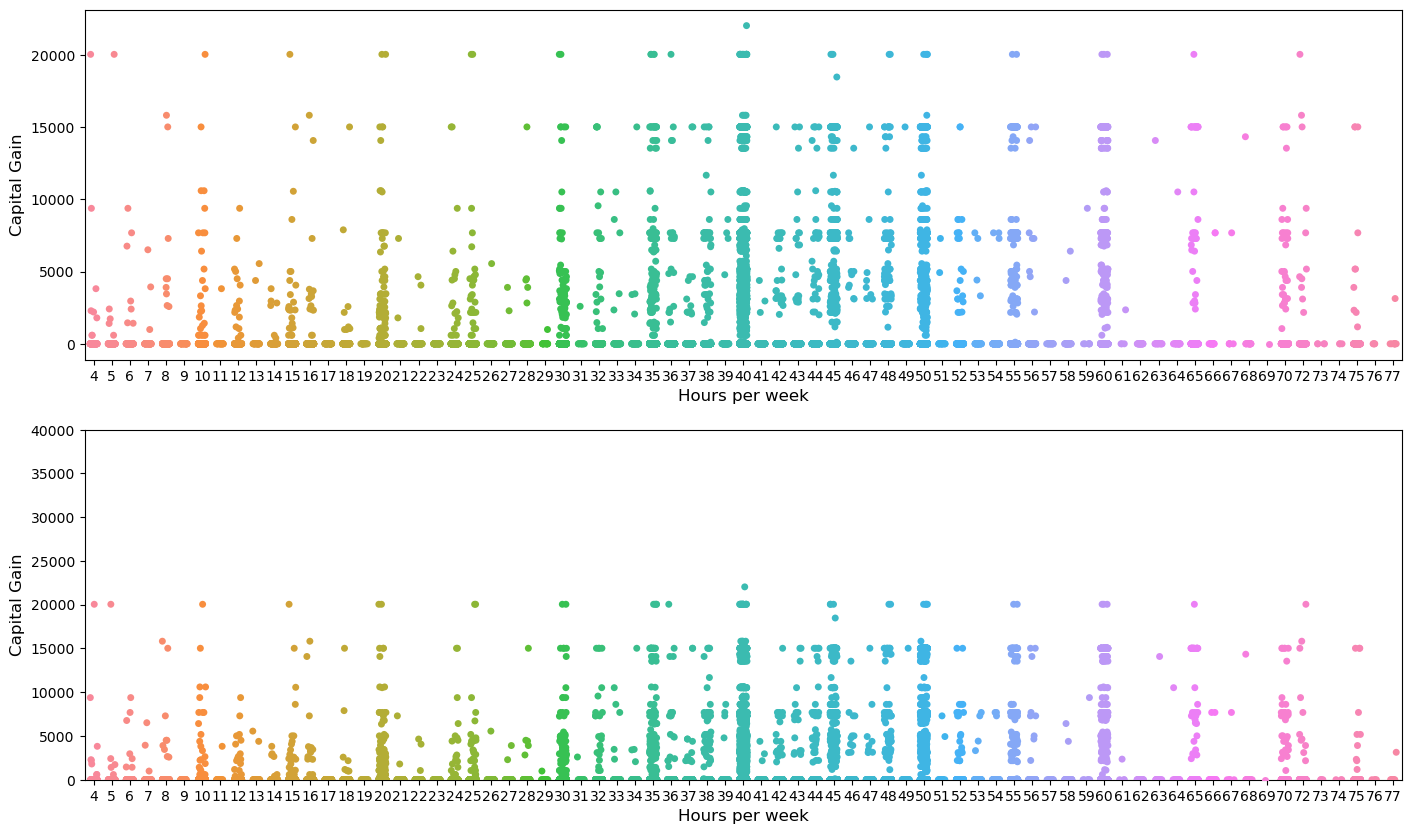

In [70]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.
There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

In [71]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['hours-per-week'] == 99][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


In [72]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    47177.000000
mean       442.222057
std       2298.442641
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22040.000000
Name: capital_change, dtype: float64

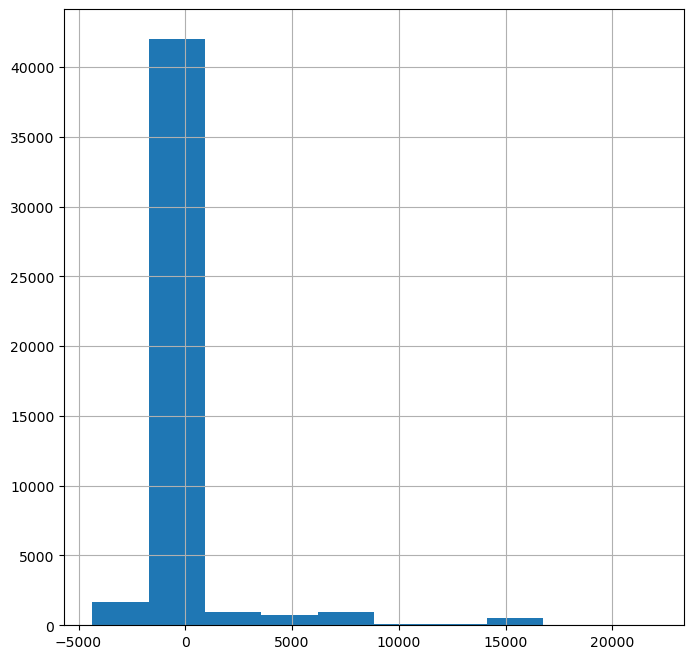

In [73]:
data["capital_change"].hist(figsize=(8,8))
plt.show()

The summary statistics and distribution of capital_change shows that:

It is similar summary stats and distribution to the capital gain and capital loss.
This suggest that , we may replace these two features with one feature called capital_change

In [74]:
income_1 = data[data['income']==1]["capital_change"]
income_0 = data[data['income']==0]["capital_change"]

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 1.81623819208751
p-value 0.07462579778451692
we accept null hypothesis


Final conclusion
- We can conclude that there is difference in Mean of income group >50k and income group <=50k.
- Hence, we can replace capital-gain and capital-loss with capital-change.

Feature Removal:

1. Education num and education are giving similar information.
2. Using capital-gain and capital loss , we can make new variable called capital-change.

Outliers Summary:
1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
2. Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.

Other conclusion:
    
1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.7. For "female" earning more than 50k is rare with only 3.62% of all observations.
   But for male, 20.31% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).